In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import operator
from skimage.transform import resize


True

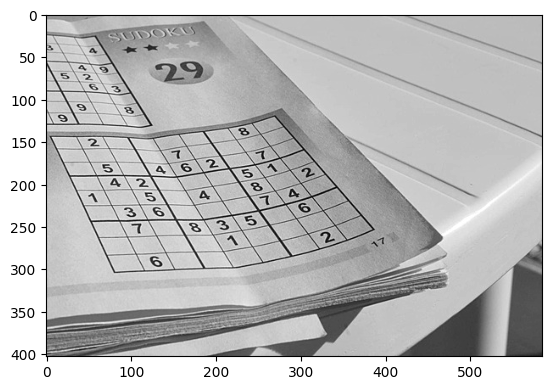

In [6]:
# img=cv2.imread('test2.jpg',cv2.IMREAD_GRAYSCALE)
# plt.imshow(img,cmap='gray')
# cv2.imwrite('test2gray.jpg',img)

In [9]:
import cv2

def gamma_correct(image, gamma):
  """
  Applies gamma correction to an image using OpenCV.

  Args:
    image: A NumPy array or OpenCV Mat representing the image.
    gamma: The gamma value (e.g., 2.2).

  Returns:
    The gamma-corrected image.
  """

  # Convert to grayscale if needed
  if len(image.shape) > 2:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply gamma correction
  corrected_image = cv2.pow(image / 255.0, gamma) * 50

  return corrected_image

# Example usage
image = cv2.imread("15-GoneWithTheWind.jpg")
corrected_image = gamma_correct(image, 2.2)

# Display the original and corrected images
cv2.imshow("Original Image", image)
cv2.imshow("Gamma-Corrected Image", corrected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#video capture
# cap=cv2.VideoCapture(0)
# while True:
#     ret,frame=cap.read()
#     gray=cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
#     cv2.imshow('frame',frame)
#     cv2.imshow('gray',gray)
#     if cv2.waitKey(1) & 0xff == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()


In [11]:
# img_line=cv2.imread('test2.jpg',cv2.IMREAD_COLOR)
# cv2.line(img_line,(0,0),(150,150),(255,255,255),15)
# cv2.rectangle(img_line,(0,0),(150,150),(0,255,0),10)
# cv2.imshow('img',img_line)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [65]:


# Load the image
# Read the original image
image = cv2.imread('C:/Users/Mazen Mohamed/Downloads/05-Ya3amSheel2elCoinYa3am.jpg')

points_to_remove = np.array([
    [950, 90],
    [800, 90],
    [760, 90],
    [790, 90],
    [795, 90]
])

# Create a mask to cover the points to be removed
mask = np.zeros_like(image, dtype=np.uint8)
cv2.fillPoly(mask, [points_to_remove], (255, 255, 255))  # Fill the points with white color (you can change the color)

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Apply the mask to the image to remove the specified points
result = cv2.bitwise_and(image, mask_inv)

# Display or save the resulting image
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()



# if image is not None:
#     # Define the region to be inpainted (covering the coin in the top-right corner)
#     mask = np.zeros(image.shape[:2], np.uint8)  # Initialize mask
#
#     # Define a rectangular region covering the coin in the top-right corner
#     coin_top_right_x = 920  # Adjust this value based on the coin's top-right corner x-coordinate
#     coin_top_right_y = 70  # Adjust this value based on the coin's top-right corner y-coordinate
#     coin_width = 60  # Adjust this value to cover the coin's width
#     coin_height = 60  # Adjust this value to cover the coin's height
#     mask[coin_top_right_y:coin_top_right_y + coin_height, coin_top_right_x - coin_width:coin_top_right_x] = 255
#
#     # Inpaint the region covered by the coin
#     inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
#
#     # Display the original image and the inpainted image
#     cv2.imshow('Original Image', image)
#     cv2.imshow('Inpainted Image', inpainted_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
# else:
#     print("Error loading the image. Please check the file path.")

<function destroyAllWindows>

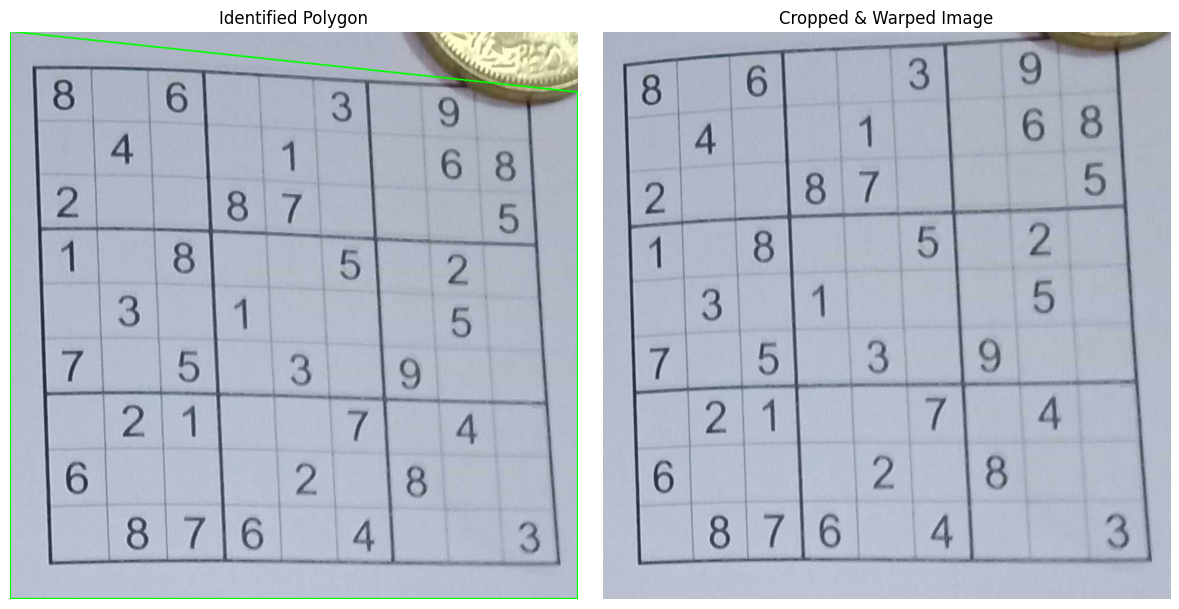

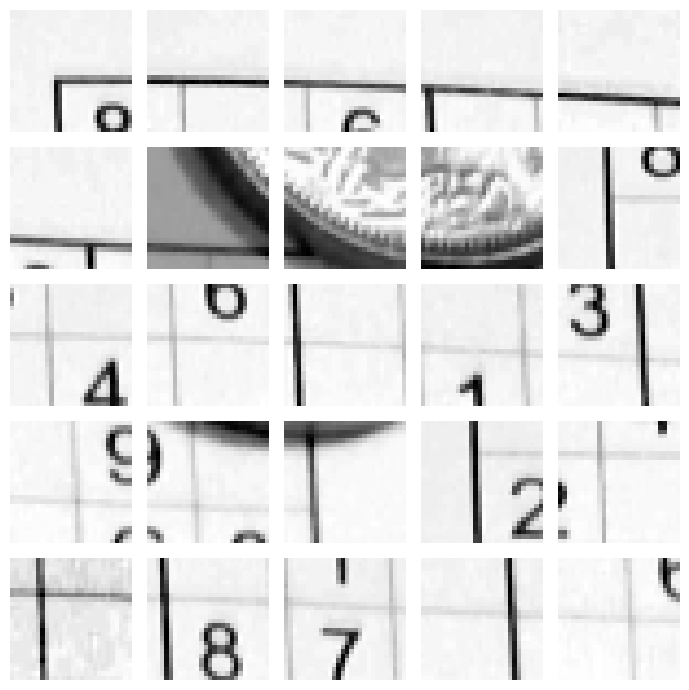

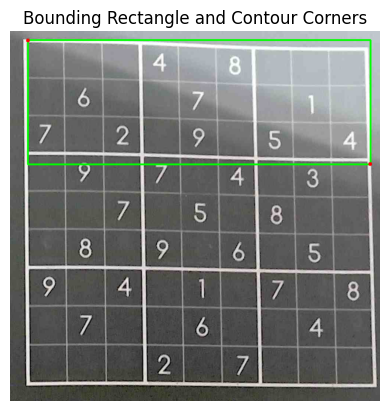

In [9]:
import cv2
import numpy as np

def detect_biggest_contour(image):
    # Preprocess the image
    image = cv2.GaussianBlur(image, (5, 5), 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 100 and area < 10000:
            filtered_contours.append(contour)

    # Identify grid corners
    grid_corners = []
    for contour in filtered_contours:
        rect = cv2.minAreaRect(contour)
        if abs(rect[1][0] / rect[1][1] - 1) < 0.1:
            grid_corners.append(rect[0])

    # Handle hidden corner
    if len(grid_corners) < 4:
        # Estimate the hidden corner
        hidden_corner = (
            (grid_corners[0][0] + grid_corners[2][0]) // 2,
            (grid_corners[0][1] + grid_corners[2][1]) // 2
        )
        grid_corners.append(hidden_corner)

    # Sort grid corners by their x and y coordinates
    if len(grid_corners) == 4:
        grid_corners = sorted(grid_corners, key=lambda corner: (corner[0], corner[1]))

    # Draw the grid
    for i in range(len(grid_corners) - 1):
        cv2.line(image, grid_corners[i], grid_corners[i + 1], (0, 255, 0), 2)
    cv2.line(image, grid_corners[3], grid_corners[0], (0, 255, 0), 2)

    return image

def extract_sudoku_numbers(image):
    # Preprocess the image
    image = cv2.GaussianBlur(image, (5, 5), 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 100 and area < 10000:
            filtered_contours.append(contour)

    # Identify grid corners
    grid_corners = []
    for contour in filtered_contours:
        rect = cv2.minAreaRect(contour)
        if abs(rect[1][0] / rect[1][1] - 1) < 0.1:
            grid_corners.append(rect[0])

    # Handle hidden corner
    if len(grid_corners) < 4:
        # Estimate the hidden corner
        hidden_corner = (
            (grid_corners[0][2] + grid_corners[2][0]) // 2,
            (grid_corners[0][1] + grid_corners[2][1]) // 2
        )
        grid_corners.append(hidden_corner)

    # Sort grid corners by their x and y coordinates
    if len(grid_corners) == 4:
        grid_corners = sorted(grid_corners, key=lambda corner: (corner[0], corner[1]))

    # Extract Sudoku numbers
    sudoku_numbers = []
    for i in range(9):
        for j in range(9):
            # Define the region of interest for each Sudoku cell
            x1, y1 = grid_corners[i][0], grid_corners[j][1]
            x2, y2 = grid_corners[i + 1][0], grid_corners[j + 1][1]
            roi = image[y1:y2, x1:x2]

            # Preprocess the ROI
            roi = cv2.GaussianBlur(roi, (3, 3), 0)
            roi = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY_INV)[1]

            # Extract the Sudoku number as a digit
            sudoku_numbers.append(cv2.countNonZero(roi) // 255)

    return sudoku_numbers

# Read the image
image = cv2.imread("C:/Users/Mazen Mohamed/Downloads/05-Ya3amSheel2elCoinYa3am.jpg")

# Detect the biggest contour
result_image = detect_biggest_contour(image)

# Extract the Sudoku numbers
sudoku_numbers = extract_sudoku_numbers(image)

# Print the extracted Sudoku numbers
print(sudoku_numbers)

IndexError: list index out of range

(1000, 1000, 3)


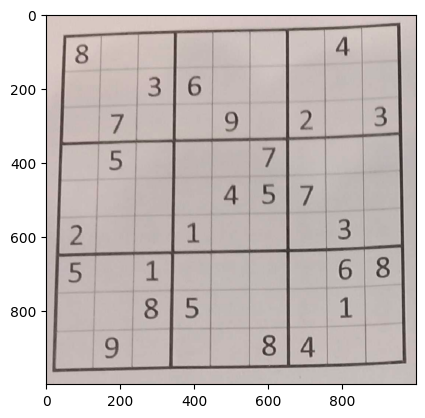

In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread("C:/Users/Mazen Mohamed/Downloads/01-Normal.jpg")
print(img.shape)
plt.imshow(img)

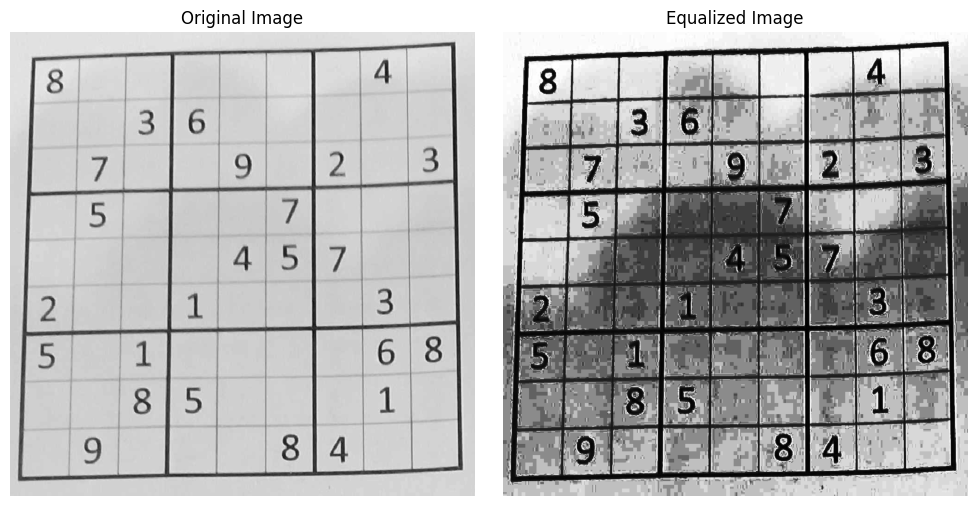

In [42]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('c:/Users/Mazen Mohamed/Downloads/01-Normal.jpg', 0)  # Ensure to load the image in grayscale (0)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display original and equalized images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

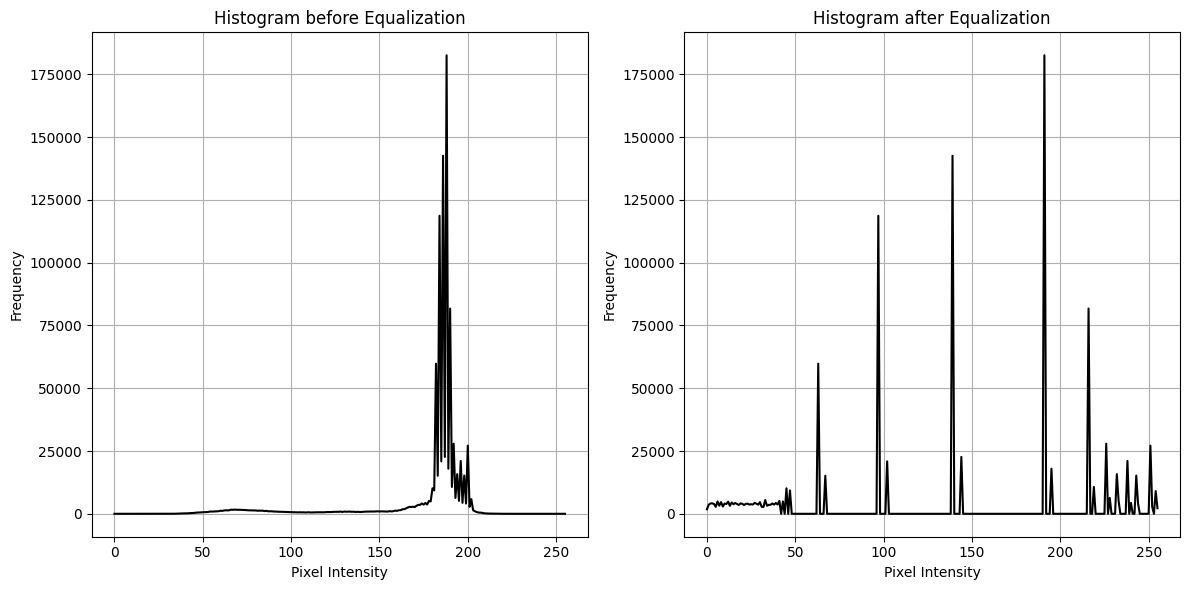

In [44]:
# Calculate histogram of original image
hist_original = cv2.calcHist([image], [0], None, [256], [0,256])


# Calculate histogram of equalized image
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0,256])

# Plot histograms before and after equalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='black')
plt.title('Histogram before Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(hist_equalized, color='black')
plt.title('Histogram after Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_equ = cv2.equalizeHist(img_gray)



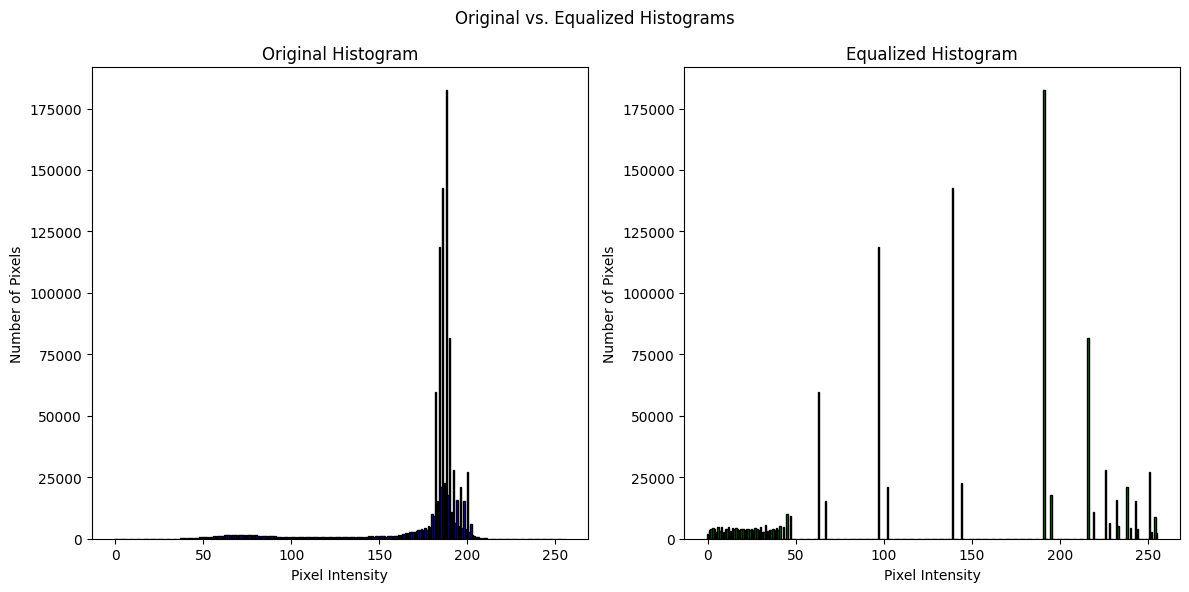

In [40]:
# Calculate histograms
hist_orig, bins_orig = np.histogram(img_gray.flatten(), bins=256, range=(0, 256))
hist_equ, bins_equ = np.histogram(img_equ.flatten(), bins=256, range=(0, 256))

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot original histogram
ax[0].bar(bins_orig[:-1], hist_orig, color='blue', edgecolor='k')
ax[0].set_title("Original Histogram")
ax[0].set_xlabel("Pixel Intensity")
ax[0].set_ylabel("Number of Pixels")

# Plot equalized histogram
ax[1].bar(bins_equ[:-1], hist_equ, color='green', edgecolor='k')
ax[1].set_title("Equalized Histogram")
ax[1].set_xlabel("Pixel Intensity")
ax[1].set_ylabel("Number of Pixels")

# Adjust layout and show plot
fig.suptitle("Original vs. Equalized Histograms")
plt.tight_layout()
plt.show()


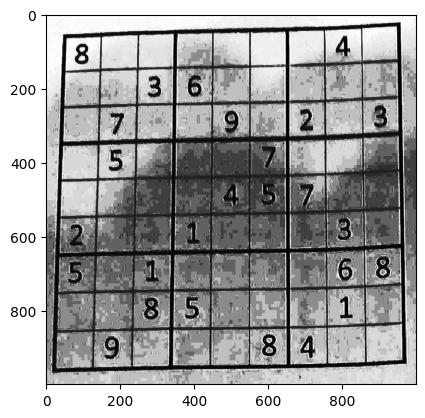

In [41]:

plt.imshow( img_equ,cmap="gray")

In [5]:
box = cv2.boxFilter(img, -1, (21,21))
blur = cv2.blur(img, (21,21))
gauss = cv2.GaussianBlur(img, (21,21), 0)
median = cv2.medianBlur(img, 21)

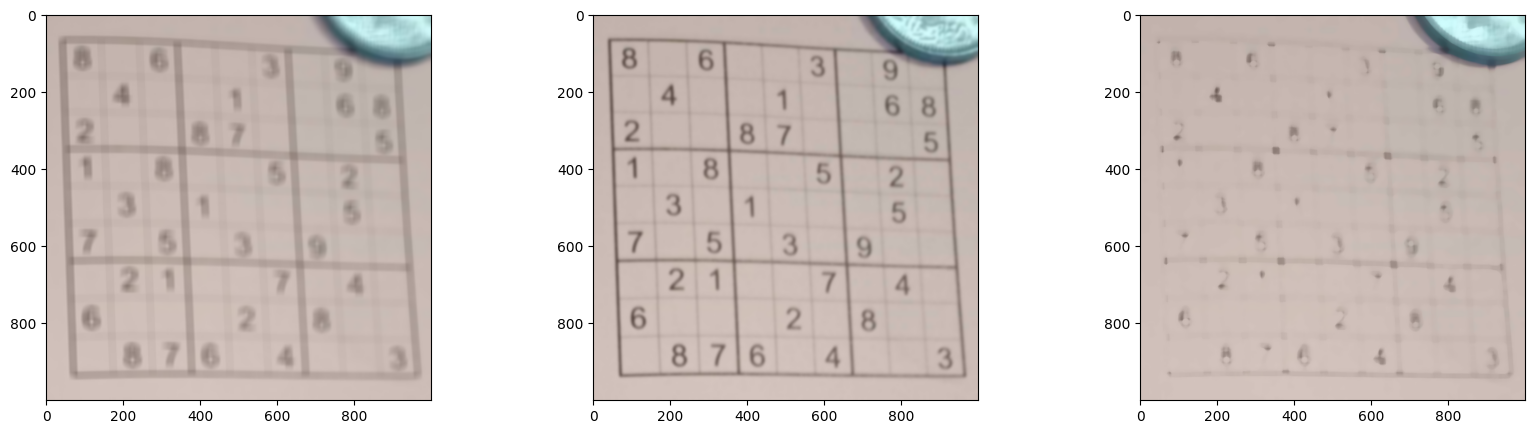

In [6]:
_, axarr = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) # figsize is in inches, yuck
plt.sca(axarr[0]); plt.imshow(blur);
plt.sca(axarr[1]); plt.imshow(gauss);
plt.sca(axarr[2]); plt.imshow(median);
plt.show()

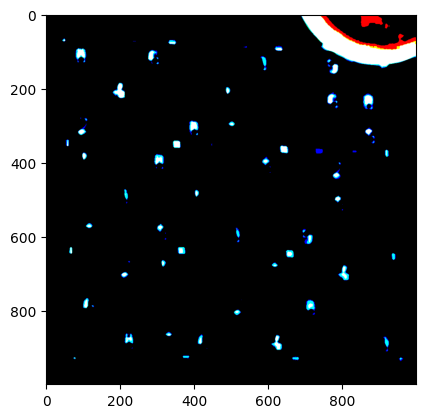

In [10]:
ret,thresh1 = cv2.threshold(median,158,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh1)

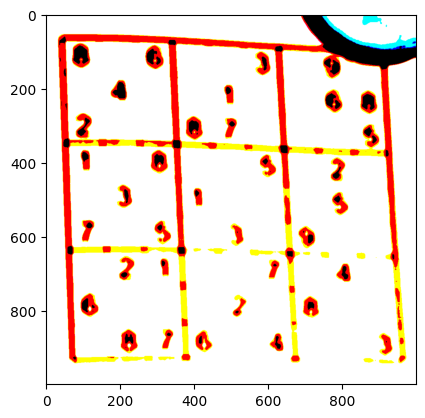

In [24]:
ret,thresh2 = cv2.threshold(blur,158,255,cv2.THRESH_BINARY)
plt.imshow(thresh2,cmap="gray")

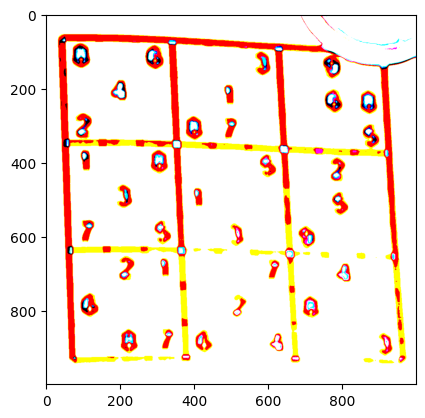

In [25]:
thresh3=cv2.add(thresh1,thresh2)
plt.imshow(thresh3,cmap="gray")

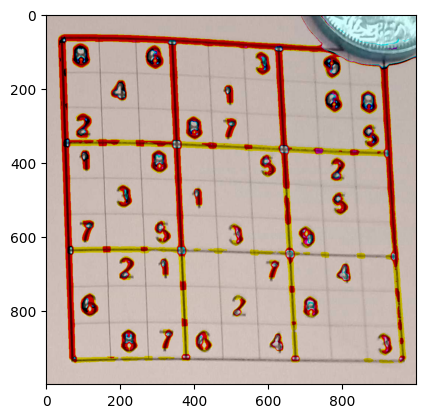

In [26]:
img_cut = cv2.bitwise_and(img, thresh3)
plt.imshow(img_cut,cmap="gray")

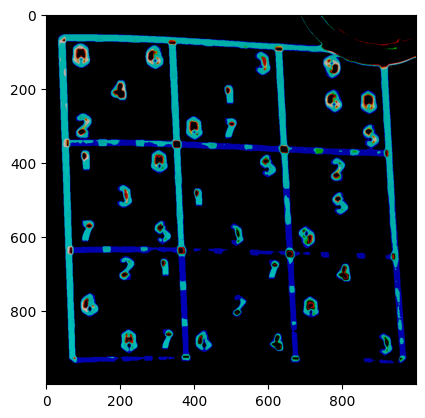

In [28]:
img_fill = cv2.bitwise_and(median, cv2.bitwise_not(thresh3))
plt.imshow(img_fill,cmap="gray")

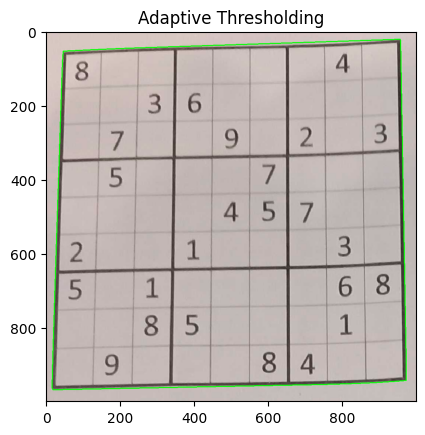

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Read the dark mode image
image = cv2.imread('c:/Users/Mazen Mohamed/Downloads/01-Normal.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarize the image using thresholding
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)[1]
img_gray_threshed = cv2.adaptiveThreshold(src=gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=111,
    C=-3
)
plt.title('Adaptive Thresholding')
plt.imshow(img_gray_threshed, cmap="gray");

# Perform morphological operations to remove noise
kernel = np.ones((5,5), np.uint8)
morph = cv2.morphologyEx(img_gray_threshed, cv2.MORPH_CLOSE, kernel)

# Find the contours in the binary image
contours, _ = cv2.findContours(img_gray_threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter the contours based on area
largest_contour = max(contours, key=cv2.contourArea)

# Obtain the convex hull of the largest contour
hull = cv2.convexHull(largest_contour)

# Draw the convex hull on the original image
cv2.drawContours(image, [hull], -1, (0, 255, 0), 2)
plt.imshow(image,cmap="gray")
plt.show()

In [7]:
import cv2
import numpy as np

def is_dark_mode_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Method 1: Pixel Analysis
    average_pixel_intensity = np.mean(img)
    if average_pixel_intensity < 100:  # Adjust threshold as needed
        return True  # Dark mode image

    # Method 2: Histogram Analysis
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [2], None, [256], [0, 256])
    total_pixels = hsv.shape[0] * hsv.shape[1]
    dark_pixels = np.sum(hist[:100])  # Considering pixels with low intensity
    if (dark_pixels / total_pixels) > 0.4:  # Adjust threshold as needed
        return True  # Dark mode image

    # Method 3: Color Distribution Analysis (Check for dominance of darker colors)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
    white_pixels = cv2.countNonZero(thresholded)
    if (white_pixels / total_pixels) < 0.5:  # Adjust threshold as needed
        return True  # Dark mode image

    # If none of the conditions met, assume it's not a dark mode image
    return False

# Example usage
image_path = 'c:/Users/Mazen Mohamed/Downloads/13-DarkMode.jpg'
result = is_dark_mode_image(image_path)
if result:
    print("The image is captured in dark mode.")
else:
    print("The image is not captured in dark mode.")


The image is captured in dark mode.


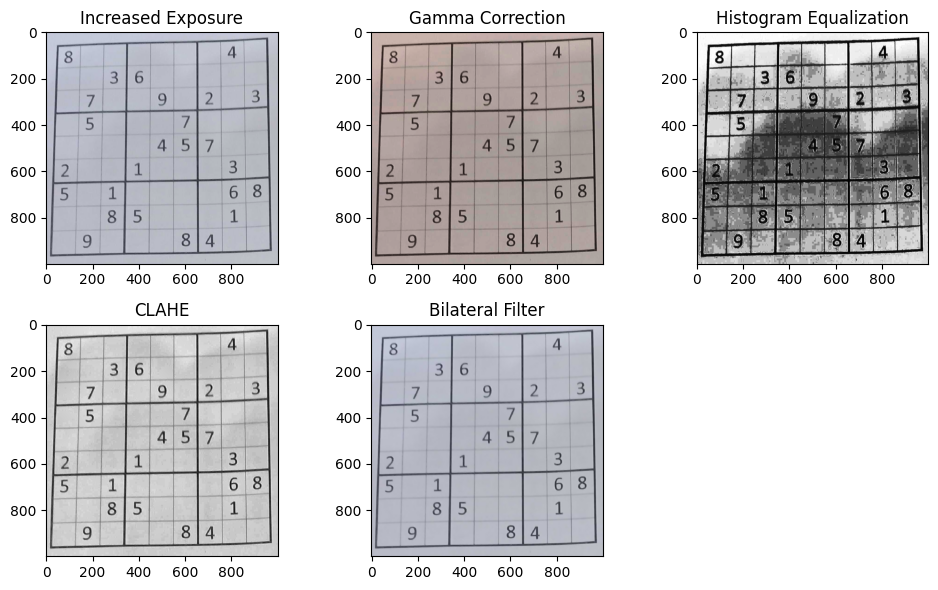

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the dark mode image
image = cv2.imread("c:/Users/Mazen Mohamed/Downloads/01-Normal.jpg")

# Convert the image to grayscale for some enhancement techniques
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Enhance the image using a combination of techniques

# 1. Increase Exposure
beta = 1.5
exposure_image = cv2.convertScaleAbs(image, beta=beta)

# 2. Adjust Gamma
gamma = 1.5
gamma_corrected = np.array(255 * (exposure_image / 255) ** gamma, dtype='uint8')

# 3. Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)

# 4. CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray_image)

# 5. Bilateral Filter
bilateral_image = cv2.bilateralFilter(image, 9, 75, 75)

# Display the enhanced image using Matplotlib
plt.figure(figsize=(10, 6))

plt.subplot(231)
plt.imshow(cv2.cvtColor(exposure_image, cv2.COLOR_BGR2RGB))
plt.title('Increased Exposure')

plt.subplot(232)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma Correction')

plt.subplot(233)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(234)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE')

plt.subplot(235)
plt.imshow(cv2.cvtColor(bilateral_image, cv2.COLOR_BGR2RGB))
plt.title('Bilateral Filter')

plt.tight_layout()
plt.show()


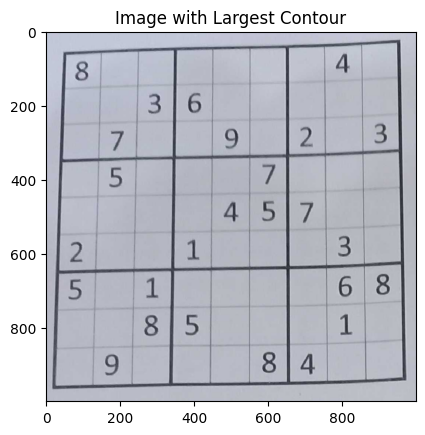

In [4]:
bilateral_gray = cv2.cvtColor(bilateral_image, cv2.COLOR_BGR2GRAY)

# Convert the enhanced grayscale image to a binary format
ret, binary_image = cv2.threshold(bilateral_gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour based on area
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask to draw the largest contour
mask = np.zeros_like(bilateral_gray)
cv2.drawContours(mask, [largest_contour], -1, (255), 10)  # Draw the largest contour on the mask

# Apply the mask to the original image to highlight the largest contour
result_image = cv2.bitwise_not(image, image, mask=mask)

# Display the image with the largest contour
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Largest Contour')
plt.show()

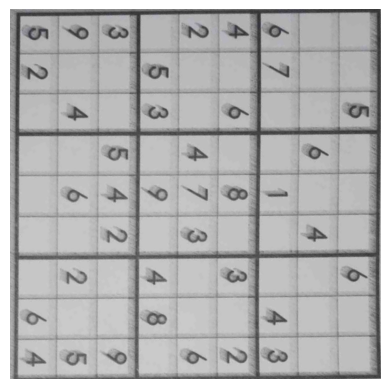

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def perspective_transform(image, corners):
    def order_corner_points(corners):
        # Separate corners into individual points
        # Index 0 - top-right
        #       1 - top-left
        #       2 - bottom-left
        #       3 - bottom-right
        corners = [(corner[0][0], corner[0][1]) for corner in corners]
        top_r, top_l, bottom_l, bottom_r = corners[0], corners[1], corners[2], corners[3]
        return (top_l, top_r, bottom_r, bottom_l)
    # Order points in clockwise order
    ordered_corners = order_corner_points(corners)
    top_l, top_r, bottom_r, bottom_l = ordered_corners
    # Determine width of new image which is the max distance between
    # (bottom right and bottom left) or (top right and top left) x-coordinates
    width_A = np.sqrt(((bottom_r[0] - bottom_l[0]) ** 2) + ((bottom_r[1] - bottom_l[1]) ** 2))
    width_B = np.sqrt(((top_r[0] - top_l[0]) ** 2) + ((top_r[1] - top_l[1]) ** 2))
    width = max(int(width_A), int(width_B))
    # Determine height of new image which is the max distance between
    # (top right and bottom right) or (top left and bottom left) y-coordinates
    height_A = np.sqrt(((top_r[0] - bottom_r[0]) ** 2) + ((top_r[1] - bottom_r[1]) ** 2))
    height_B = np.sqrt(((top_l[0] - bottom_l[0]) ** 2) + ((top_l[1] - bottom_l[1]) ** 2))
    height = max(int(height_A), int(height_B))
    # Construct new points to obtain top-down view of image in
    # top_r, top_l, bottom_l, bottom_r order
    dimensions = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1],
                    [0, height - 1]], dtype = "float32")
    # Convert to Numpy format
    ordered_corners = np.array(ordered_corners, dtype="float32")
    # Find perspective transform matrix
    matrix = cv2.getPerspectiveTransform(ordered_corners, dimensions)
    # Return the transformed image
    return cv2.warpPerspective(image, matrix, (width, height))
image = cv2.imread('12-BrokenPrinter.jpg')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 3)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 109, 3)
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.015 * peri, True)
    transformed = perspective_transform(original, approx)
    break

# Convert BGR image to RGB for displaying with plt.imshow
transformed_rgb = cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB)

# Display using Matplotlib
plt.imshow(transformed_rgb)
plt.axis('off')  # Hide axes
plt.show()

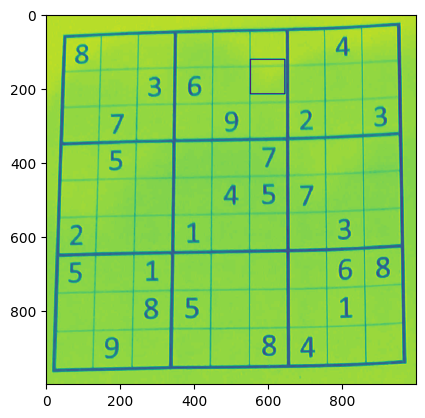

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load template and Sudoku image (replace with your images)
template = cv2.imread("66.jpg",0)
sudoku_image = cv2.imread("01-Normal.jpg",0)

# Choose a template matching method
method = cv2.TM_CCOEFF_NORMED

# Perform template matching
result = cv2.matchTemplate(sudoku_image, template, method)

# Get the best match coordinates
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw a rectangle around the detected number 8
cv2.rectangle(sudoku_image, max_loc, (max_loc[0] + template.shape[1], max_loc[1] + template.shape[0]), (0, 0, 255), 2)

# Display the result
plt.imshow( sudoku_image)
plt.show()


In [20]:
import cv2
import numpy as np

# Load digit templates (replace with your actual template images)
templates = [cv2.imread(f"template_{digit}.png", 0) for digit in range(10)]

# Function to measure similarity between two images (customize as needed)
def custom_similarity(image1, image2):
    # Example: Normalized cross-correlation
    result = cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, _ = cv2.minMaxLoc(result)
    return max_val

# Iterate through tiles and match with templates
for tile in tiles:
    best_match_score = 0
    best_match_digit = None

    # Resize tile to match template size for consistent comparison
    tile = cv2.resize(tile, templates[0].shape)

    for digit, template in enumerate(templates):
        match_score = custom_similarity(tile, template)
        if match_score > best_match_score:
            best_match_score = match_score
            best_match_digit = digit

    # Process the recognized digit
    print(f"Recognized digit: {best_match_digit}")

ValueError: chr() arg not in range(0x110000)

In [5]:
from PIL import Image, ImageDraw, ImageFont
import os

# Function to create output folder if it doesn't exist
def create_output_folder(folder_name):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

# Function to generate images with centered digits using Lato font style
def generate_images():
    output_folder = "up"
    create_output_folder(output_folder)

    # Define image properties
    width, height = 55, 55
    font_size = 49
    font_path = "C:/Users/Mazen Mohamed/PycharmProjects/cvphase1/fonts/ARLRDBD.ttf"  # Path to Lato font file

    font = ImageFont.truetype(font_path, font_size)
    right_shift = 10

    for i in range(1, 10):
        # Create a black image
        img = Image.new("RGB", (width, height), "black")
        draw = ImageDraw.Draw(img)

        # Get text size and position to center the digit
        text = str(i)
        text_width, text_height = draw.textsize(text, font=font)
        text_x = (width - text_width) / 2 
        text_y = (height - text_height) / 2-right_shift

        # Draw the centered digit on the image
        draw.text((text_x, text_y), text, fill="white", font=font)

        # Save the image
        img.save(f"{output_folder}/number_2{i}.png")

        print(f"Generated image for number {i}")

# Generate images using Lato font style
generate_images()


Generated image for number 1
Generated image for number 2
Generated image for number 3
Generated image for number 4
Generated image for number 5
Generated image for number 6
Generated image for number 7
Generated image for number 8
Generated image for number 9


C:\Users\Mazen Mohamed\AppData\Local\Temp\ipykernel_8360\2747335396.py:29: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)
C:\Users\Mazen Mohamed\AppData\Local\Temp\ipykernel_8360\2747335396.py:29: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)
C:\Users\Mazen Mohamed\AppData\Local\Temp\ipykernel_8360\2747335396.py:29: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)
C:\Users\Mazen Mohamed\AppData\Local\Temp\ipykernel_8360\2747335396.py:29: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the larger image
large_image = cv2.imread('C:/Users/Mazen Mohamed/PycharmProjects/cvphase1/tile_4_4.png')
large_image_gray = cv2.cvtColor(large_image, cv2.COLOR_BGR2GRAY)

# Load the original template
original_template = cv2.imread('C:/Users/Mazen Mohamed/PycharmProjects/cvphase1/output/number_4.png')
template = original_template.copy()
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Define the scaling factor for resizing the template
scaling_factor = 1.2  # You can adjust this value based on your needs

# Perform template matching while resizing the template
while True:
    if template.shape[0] < large_image.shape[0] and template.shape[1] < large_image.shape[1]:
        # Perform template matching
        result = cv2.matchTemplate(large_image_gray, template_gray, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        # Threshold for similarity - adjust based on your needs
        threshold = 0.6

        if max_val >= threshold:
            # Template matched successfully, get the coordinates
            top_left = max_loc
            h, w = template.shape[:2]
            bottom_right = (top_left[0] + w, top_left[1] + h)

            # Draw a rectangle around the matched region on the larger image
            matched_image = large_image.copy()
            cv2.rectangle(matched_image, top_left, bottom_right, (0, 255, 0), 2)

            # Display the matching result
            plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
            plt.title('Matching Result')
            plt.xticks([]), plt.yticks([])
            plt.show()

            break  # Break the loop as the template has successfully matched

    # Resize the template for the next iteration (reduce size)
    template = cv2.resize(template, None, fx=scaling_factor, fy=scaling_factor)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)


KeyboardInterrupt: 